# **Importing Important libraries:**

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing csv File**

In [285]:
data=pd.read_csv('/content/Company Attrition Data.csv')

In [286]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# **Analysing the DataFrame**

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Sales_Occured          14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [288]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Sales_Occured            0
salary                   0
dtype: int64

In [289]:
data['Sales_Occured'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [290]:
data['Sales_Occured'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Sales_Occured, dtype: int64

In [291]:
data['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

# **Explratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


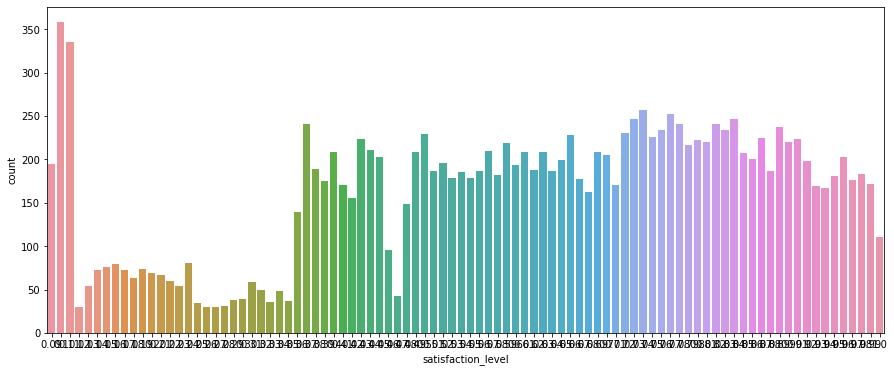

In [292]:
plt.figure(figsize=(15,6))
sns.countplot(data['satisfaction_level'])

In [335]:
yes_count=(data['left']==1).sum()
no_count=(data['left']==0).sum()
yes_per= yes_count/len(data)
no_per= no_count/len(data)
print("Percentage of employee who leave=", round(yes_per*100,2))
print("Percentage of employee who will not leave=", round(no_per*100,2))

Percentage of employee who leave= 23.81
Percentage of employee who will not leave= 76.19


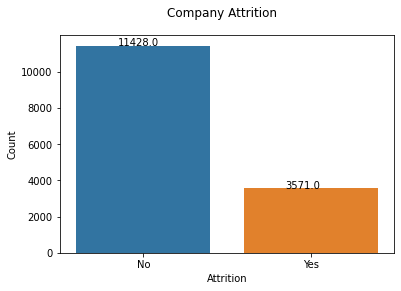

In [336]:
ax=sns.countplot(x='left',data=data)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Attrition")
ax.figure.suptitle("Company Attrition")
plt.show()

Text(0.5, 0.98, 'Company Attrition on satisfaction level')

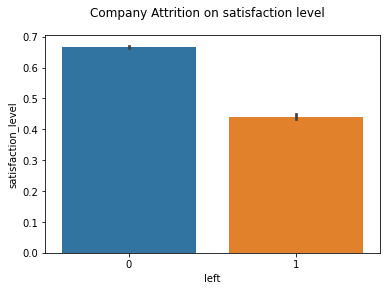

In [338]:
sns.barplot(x='left', y ='satisfaction_level',data = data).figure.suptitle("Company Attrition on satisfaction level")

In [294]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Sales_Occured', 'salary'],
      dtype='object')

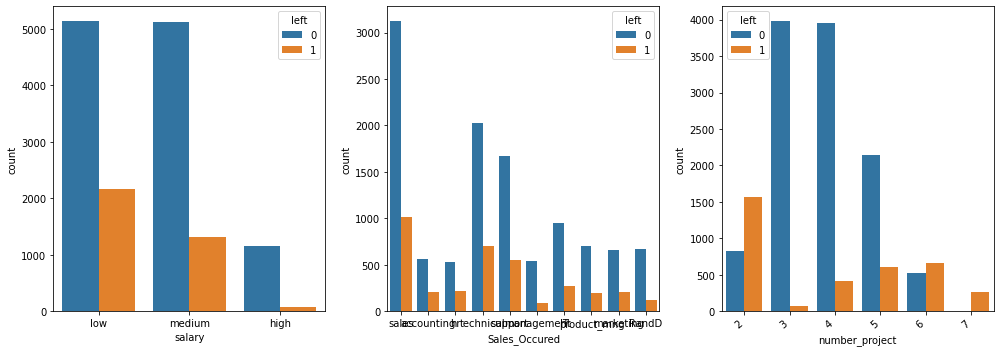

In [339]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

sns.countplot(x="salary", hue="left", data=data, ax=axes[0])
sns.countplot(x="Sales_Occured", hue="left", data=data, ax=axes[1])
sns.countplot(x="number_project", hue="left", data=data, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

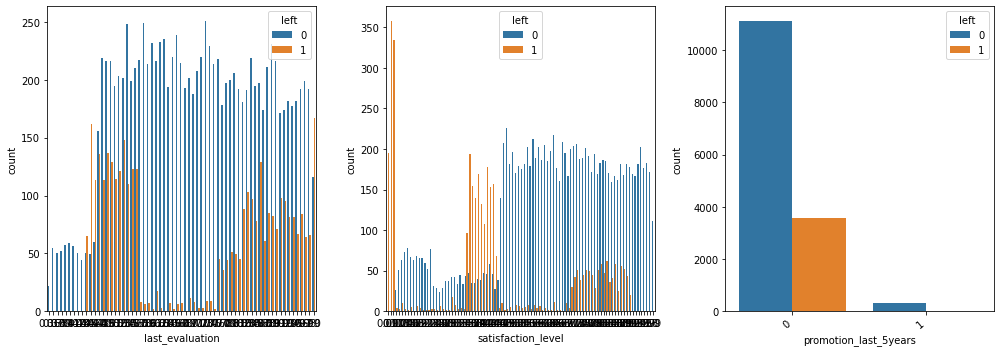

In [340]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,5))

sns.countplot(x="last_evaluation", hue="left", data=data, ax=axes[0])
sns.countplot(x="satisfaction_level", hue="left", data=data, ax=axes[1])
sns.countplot(x="promotion_last_5years", hue="left", data=data, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()

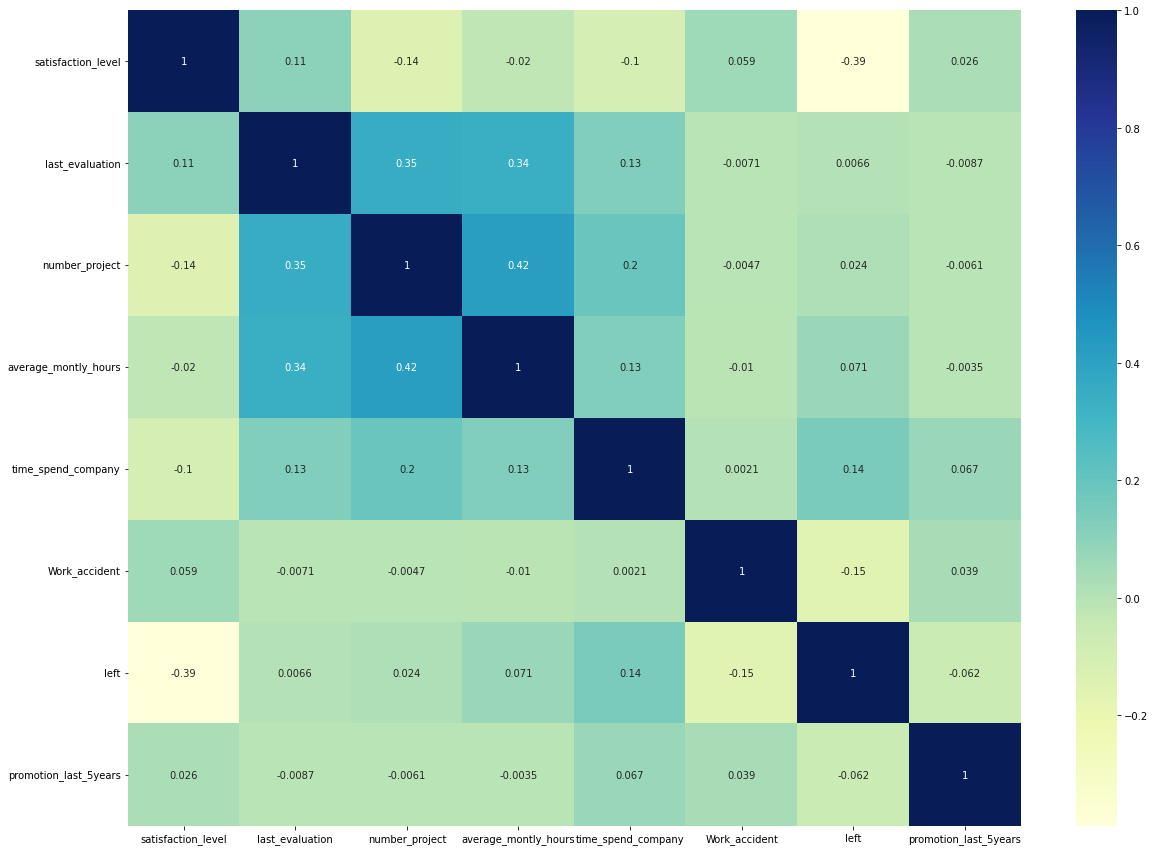

In [296]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

In [297]:
data.corr()['left']

satisfaction_level      -0.388375
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
Work_accident           -0.154622
left                     1.000000
promotion_last_5years   -0.061788
Name: left, dtype: float64

From the heatmap, we can see there is a negative(-) correlation between 'left' and satisfaction are highly correlated, which means people tend to leave a company more when they are less satisfied.

# **Preprocessing**

In [298]:
x = data.drop(['left'],axis=1)
y = data['left']
print(x.shape)
print(y.shape)

(14999, 9)
(14999,)


In [299]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Sales_Occured,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,support,low
14995,0.37,0.48,2,160,3,0,0,support,low
14996,0.37,0.53,2,143,3,0,0,support,low
14997,0.11,0.96,6,280,4,0,0,support,low


In [300]:
x.shape

(14999, 9)

In [301]:
y.shape

(14999,)

In [302]:
x=pd.get_dummies(x,drop_first=True)

In [303]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [304]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit_transform(x_train)

array([[-2.062054  ,  0.72148705,  2.58705966, ..., -0.46703614,
         1.02909241, -0.87217597],
       [-0.17575764, -0.21234465,  0.15975498, ..., -0.46703614,
        -0.97173003,  1.14655761],
       [-0.89816901, -1.37963426, -1.45844814, ...,  2.14116194,
         1.02909241, -0.87217597],
       ...,
       [ 0.18544805,  0.07947776,  0.96885654, ..., -0.46703614,
        -0.97173003,  1.14655761],
       [ 0.70718959,  1.65531874,  0.15975498, ..., -0.46703614,
         1.02909241, -0.87217597],
       [ 1.46973493,  0.83821601, -1.45844814, ..., -0.46703614,
         1.02909241, -0.87217597]])

# **Applying SVC**

In [308]:
from sklearn.svm import SVC
model= SVC()
model.fit(x_train,y_train)

SVC()

In [309]:
train_predict_SVC= model.predict(x_train)
test_predict_SVC=model.predict(x_test)

In [310]:

Score_SVC_train=model.score(x_train,y_train)
Score_SVC_test=model.score(x_test,y_test)
print(Score_SVC_train)
print(Score_SVC_test)

0.7797885512905991
0.7811111111111111


# **Applying KNN**

In [311]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [312]:
test_pred_knn=knn.predict(x_test)
train_pred_knn=knn.predict(x_train)

In [313]:
Score_KNN_train=knn.score(x_train,y_train)
Score_KNN_test=knn.score(x_test,y_test)
print(Score_KNN_train)
print(Score_KNN_test)

0.9566625392894561
0.934


# **Applying Decision Tree Classification**

In [314]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [315]:
train_DT_predict= clf.predict(x_train)
test_DT_predict=clf.predict(x_test)

In [316]:
Score_DT_train=clf.score(x_train,y_train)
Score_DT_test=clf.score(x_test,y_test)
print(Score_DT_train)
print(Score_DT_test)

1.0
0.9728888888888889


# **Applying Random Forest Classifier**

In [317]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [318]:
train_predict_rfc= rfc.predict(x_train)
test_predict_rfc=rfc.predict(x_test)

In [319]:
Score_RFC_train=rfc.score(x_train,y_train)
Score_RFC_test=rfc.score(x_test,y_test)
print(Score_RFC_train)
print(Score_RFC_test)

1.0
0.9871111111111112


# **Applying logistic Regression**

In [341]:
# Applying LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=50)
lg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=50)

In [321]:
y_train_pred = lg.predict(x_train)
y_test_pred = lg.predict(x_test)

In [322]:
Score_LR_train=lg.score(x_train,y_train)
Score_LR_test=lg.score(x_test,y_test)
print(Score_LR_train)
print(Score_LR_test)

0.794551862082103
0.7893333333333333


# **Conclusion:**

In [343]:
from pandas.core.frame import DataFrame
Model_Comparison = DataFrame({
    'Model' : ['Logistic Regression','SVM','KNN','Decision Tree','Random Forest'],
    'Scores_test': [Score_LR_test,Score_SVC_test,Score_KNN_test,Score_DT_test,Score_RFC_test],
    'Scores_train': [Score_LR_train,Score_SVC_train,Score_KNN_train,Score_DT_train,Score_RFC_train]
    })
Model_Comparison

,Model,Scores_test,Scores_train
0,Logistic Regression,0.789333,0.794552
1,SVM,0.781111,0.779789
2,KNN,0.934000,0.956663
3,Decision Tree,0.972889,1.000000
4,Random Forest,0.987111,1.000000


In [344]:
Model_Comparison_df = Model_Comparison.sort_values(by= 'Scores_test', ascending=False)
Model_Comparison_df.reset_index()[Model_Comparison_df.columns]

,Model,Scores_test,Scores_train
0,Random Forest,0.987111,1.000000
1,Decision Tree,0.972889,1.000000
2,KNN,0.934000,0.956663
3,Logistic Regression,0.789333,0.794552
4,SVM,0.781111,0.779789


**Based on above results we can say that Random Forest gives the best score. Hence we will use that.**

In [345]:
from sklearn.metrics import classification_report
cr = classification_report(y_train,train_predict_rfc)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8000
           1       1.00      1.00      1.00      2499

    accuracy                           1.00     10499
   macro avg       1.00      1.00      1.00     10499
weighted avg       1.00      1.00      1.00     10499



In [346]:
cr = classification_report(y_test,test_predict_rfc)
print(cr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.95      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



In [347]:
from sklearn.metrics import confusion_matrix
conf_matix = confusion_matrix(y_test,test_predict_rfc)
conf_matix

array([[3420,    8],
       [  50, 1022]])